<a href="https://colab.research.google.com/github/Sanvee0306/DS/blob/main/kmeans_clustering_updated_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [3]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X

array([5.84094698e-01, 5.58271177e-01, 7.06960884e-01, 8.82776124e-01,
       8.23949601e-01, 2.81877547e-01, 8.03283446e-01, 1.27026677e-01,
       4.38012312e-01, 9.82209563e-01, 4.51107267e-01, 6.70731156e-01,
       9.98892739e-01, 9.44079510e-01, 4.04572948e-01, 8.04935581e-01,
       7.17821700e-01, 5.80325201e-03, 3.60894784e-01, 6.16038411e-01,
       3.51475189e-01, 4.90142107e-01, 7.08717906e-01, 4.08070095e-01,
       1.73591162e-01, 7.93919488e-01, 9.59723320e-01, 2.77503130e-01,
       5.24208146e-01, 5.74405896e-01, 9.74992797e-01, 7.90225336e-01,
       9.90525619e-01, 2.07360790e-01, 2.75517903e-01, 8.43639188e-01,
       6.58551769e-01, 4.38521854e-01, 3.48540729e-01, 4.18534781e-01,
       8.04697170e-01, 8.41898791e-01, 2.44996719e-01, 4.46230267e-01,
       1.26410774e-01, 5.13766122e-02, 5.13690072e-01, 5.56061654e-01,
       1.16195562e-01, 9.09749759e-01, 6.39347907e-02, 6.19053185e-01,
       2.64163791e-01, 4.92545916e-02, 9.51491139e-01, 5.08292729e-01,
      

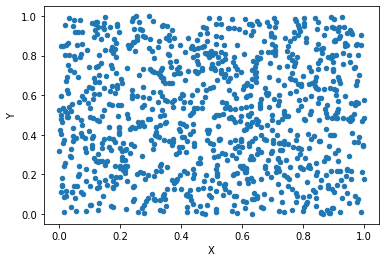

In [4]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)



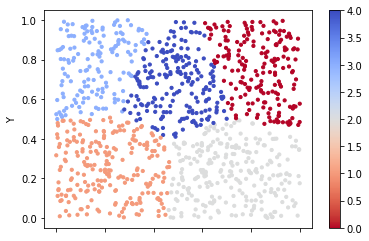

In [5]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm_r)

In [8]:
Univ = pd.read_csv("/content/Universities_Clustering (1).csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [9]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [10]:
df_norm = norm_func(Univ.iloc[:,1:])

In [11]:
df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


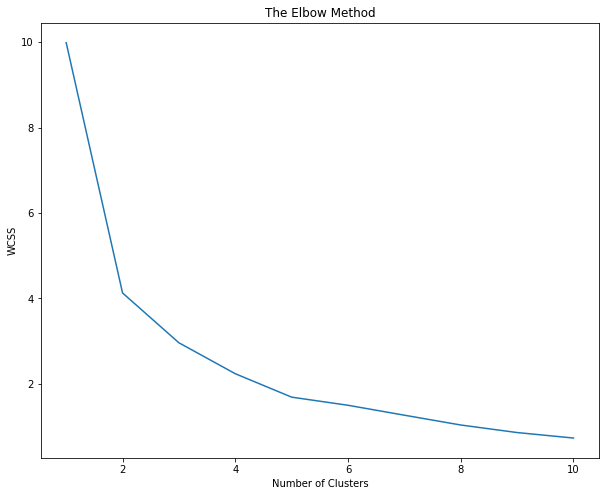

In [12]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [13]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [14]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([2, 3, 4, 2, 2, 1, 1, 2, 1, 3, 1, 2, 2, 0, 1, 0, 1, 0, 4, 2, 4, 2,
       2, 0, 1], dtype=int32)

In [15]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [16]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
1,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
2,1274.444444,80.000000,34.888889,12.444444,24295.555556,90.666667
3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
4,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333


Text(0.5, 1.0, 'Clusters using KMeans')

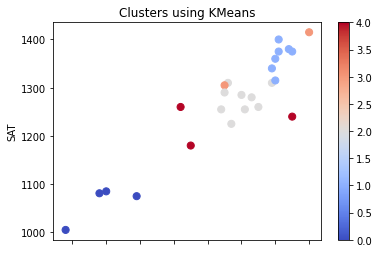

In [17]:
Univ.plot(x="Top10",y ="SAT",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [18]:
clf.inertia_

1.6781326840746353

In [19]:
WCSS 


[9.988235196638557,
 4.123452442397179,
 2.955684328573544,
 2.230804777191627,
 1.6819375916169363,
 1.491366840883087,
 1.2588710544919817,
 1.0291133191249706,
 0.8522501384310189,
 0.7237349823928728]